# Plotting and Visualization

## 1. A Brief matplotlib API Primer

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

### 1.1 Figures and Subplots

In [4]:
fig = plt.figure()    # fig is a object of plt

<Figure size 432x288 with 0 Axes>

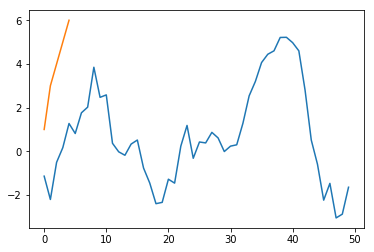

In [3]:
from numpy.random import randn
plt.plot(randn(50).cumsum()) # return a cumulative(累积的) sum
plt.plot([1,3,4,5,6])


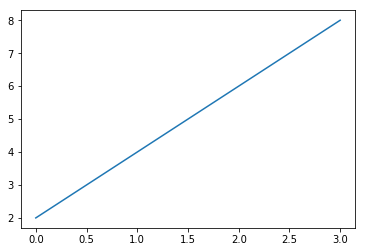

In [7]:
plt.plot([2,4,6,8])   # default x=[0,1,2,3...]

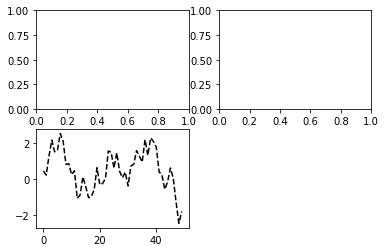

In [24]:
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)  #for width, row:column = 2:2
ax3 = plt.subplot(2, 2, 3)  #for width, row:column = 4:2

plt.plot(randn(50).cumsum(), 'k--') #only shown in the last plot


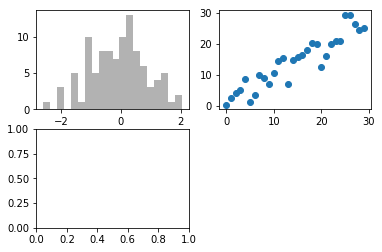

In [20]:
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)

# bins:the number of pillars, 'k' means black, alpha:the extent
ax1.hist(randn(100), bins=20, color='k', alpha=0.3) # histogram
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py

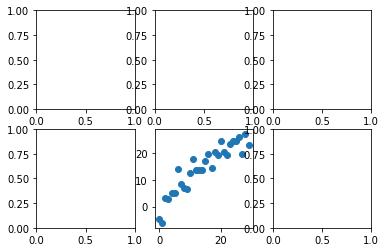

In [23]:
fig, axes = plt.subplots(2, 3)  #subplots(2,3) creates 2*3 subplot
axes[1][1].scatter(np.arange(30), np.arange(30) + 3*randn(30))

sharex: All subplots should use the same X-axis ticks (adjusting the xlim will affect all subplots)

sharey: All subplots should use the same Y-axis ticks (adjusting the ylim will affect all subplots)


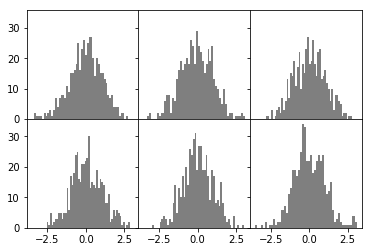

In [25]:
#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)
for i in range(2):
    for j in range(3):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 1.2 Color, Markers, and Line Styles

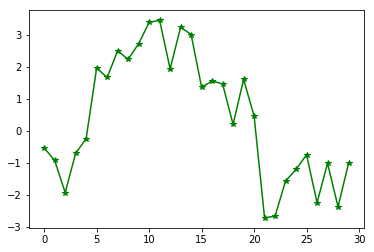

In [26]:
plt.plot(randn(30).cumsum(), 'g*-') #color=green, marker=*, linestyle=-

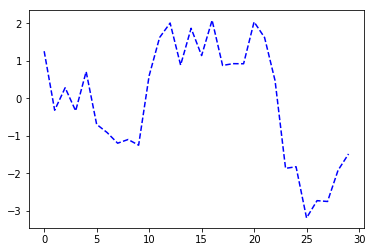

In [27]:
plt.plot(randn(30).cumsum(), linestyle='--', color='blue')

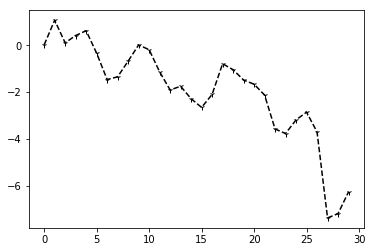

In [30]:
data = randn(30).cumsum()
#plt.plot(data, 'ko--', label='steps-post')
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='1')
# marker is the symbol in front of linestyle

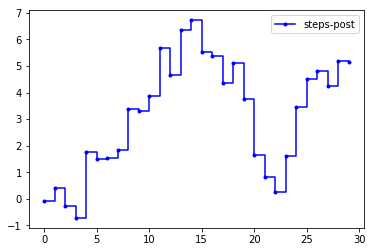

In [33]:
#drawstyle=steps(default), connects by lines; steps-post means 折线
plt.plot(data, 'b.-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best') # legend means 图例

https://matplotlib.org/users/pyplot_tutorial.html

### 1.3 Ticks, Labels, and Legends

In [ ]:
fig = plt.figure()

Text(0.5,0,'Stages')

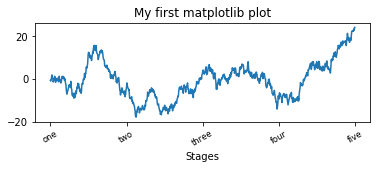

In [34]:
ax = plt.subplot(2, 1, 1)
plt.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

### 1.4 Annotations and Drawing on a Subplot

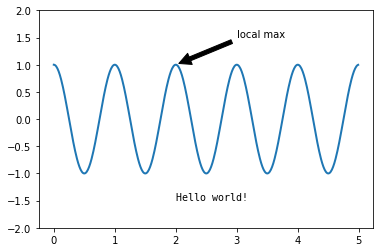

In [35]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

#annotate:注释  xy=(2,1) means location for shape
ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.05),)
ax.text(2, -1.5, 'Hello world!', family='monospace', fontsize=10)
ax.set_ylim(-2,2)  # y scale
plt.show()




https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate

## 2. Plotting Functions in pandas

### 2.1 Line Plots

In [ ]:
import numpy as np
from pandas import Series
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

In [ ]:
s.plot()
#plt.legend(loc='best')

label: Label for plot legend

ax: matplotlib subplot object to plot on. If nothing passed, uses active matplotlib subplot

style: Style string, like 'ko--', to be passed to matplotlib.

alpha: The plot fill opacity (from 0 to 1)

kind: Can be 'line', 'bar', 'barh', 'kde'

logy: Use logarithmic scaling on the Y axis

use_index: Use the object index for tick labels

rot: Rotation of tick labels (0 through 360)

xticks: Values to use for X axis ticks

yticks: Values to use for Y axis ticks

xlim: X axis limits (e.g. [0, 10])

ylim: Y axis limits

grid: Display axis grid (on by default)

In [ ]:
from pandas import DataFrame
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df

In [ ]:
df.plot(subplots = (4,1), kind = 'bar')

subplots: Plot each DataFrame column in a separate subplot
    
sharex: If subplots=True, share the same X axis, linking ticks and limits
    
sharey: If subplots=True, share the same Y axis
    
figsize: Size of figure to create as tuple
    
title: Plot title as string
    
legend: Add a subplot legend (True by default)
    
sort_columns: Plot columns in alphabetical order; by default uses existing column order


### 2.2 Bar Plot

In [ ]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
print(data)
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

### 2.3 Histograms and Density Plots

In [ ]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 3, size=200)
values = Series(np.concatenate([comp1, comp2]))
values

In [ ]:
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### 2.4 Scatter Plots

In [1]:
import pandas as pd
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

FileNotFoundError: File b'macrodata.csv' does not exist

In [ ]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

In [ ]:
pd.scatter_matrix(trans_data, diagonal='kde', alpha=0.3)

## 3. Practice

1. plot two random walks in single figure.
2. adding a legend for two lines.
3. add a "HELLO" in the figure
4. set two different color and different line style for two lines.